In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#reading train data
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.shape

(418, 11)

In [8]:
#checking null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#cabin column -- 687/891*100
#there are total 891 rows on which there are 687 null values of cabin that is more than 20% so drop that column
#drop the cabin column
train_data.drop(columns='Cabin',axis=1,inplace =True)

In [10]:
#age column -- 177/891*100 less than 20%
#replace the missing with mean value
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [11]:
#embarked column -- 2/891*100 less than 20%
#categorical - replace the missing with mode value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#checking values for test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
#cabin column -- 327/418*100
#there are total 418 rows on which there are 327 null values of cabin that is more than 20% so drop that column
#drop the cabin column
test_data.drop(columns='Cabin',axis=1,inplace=True)

In [15]:
#age column -- 86/418*100 is 20%
#replace the missing with mean value
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [16]:
#fare column -- only one row is missed fill with mean values
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [17]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

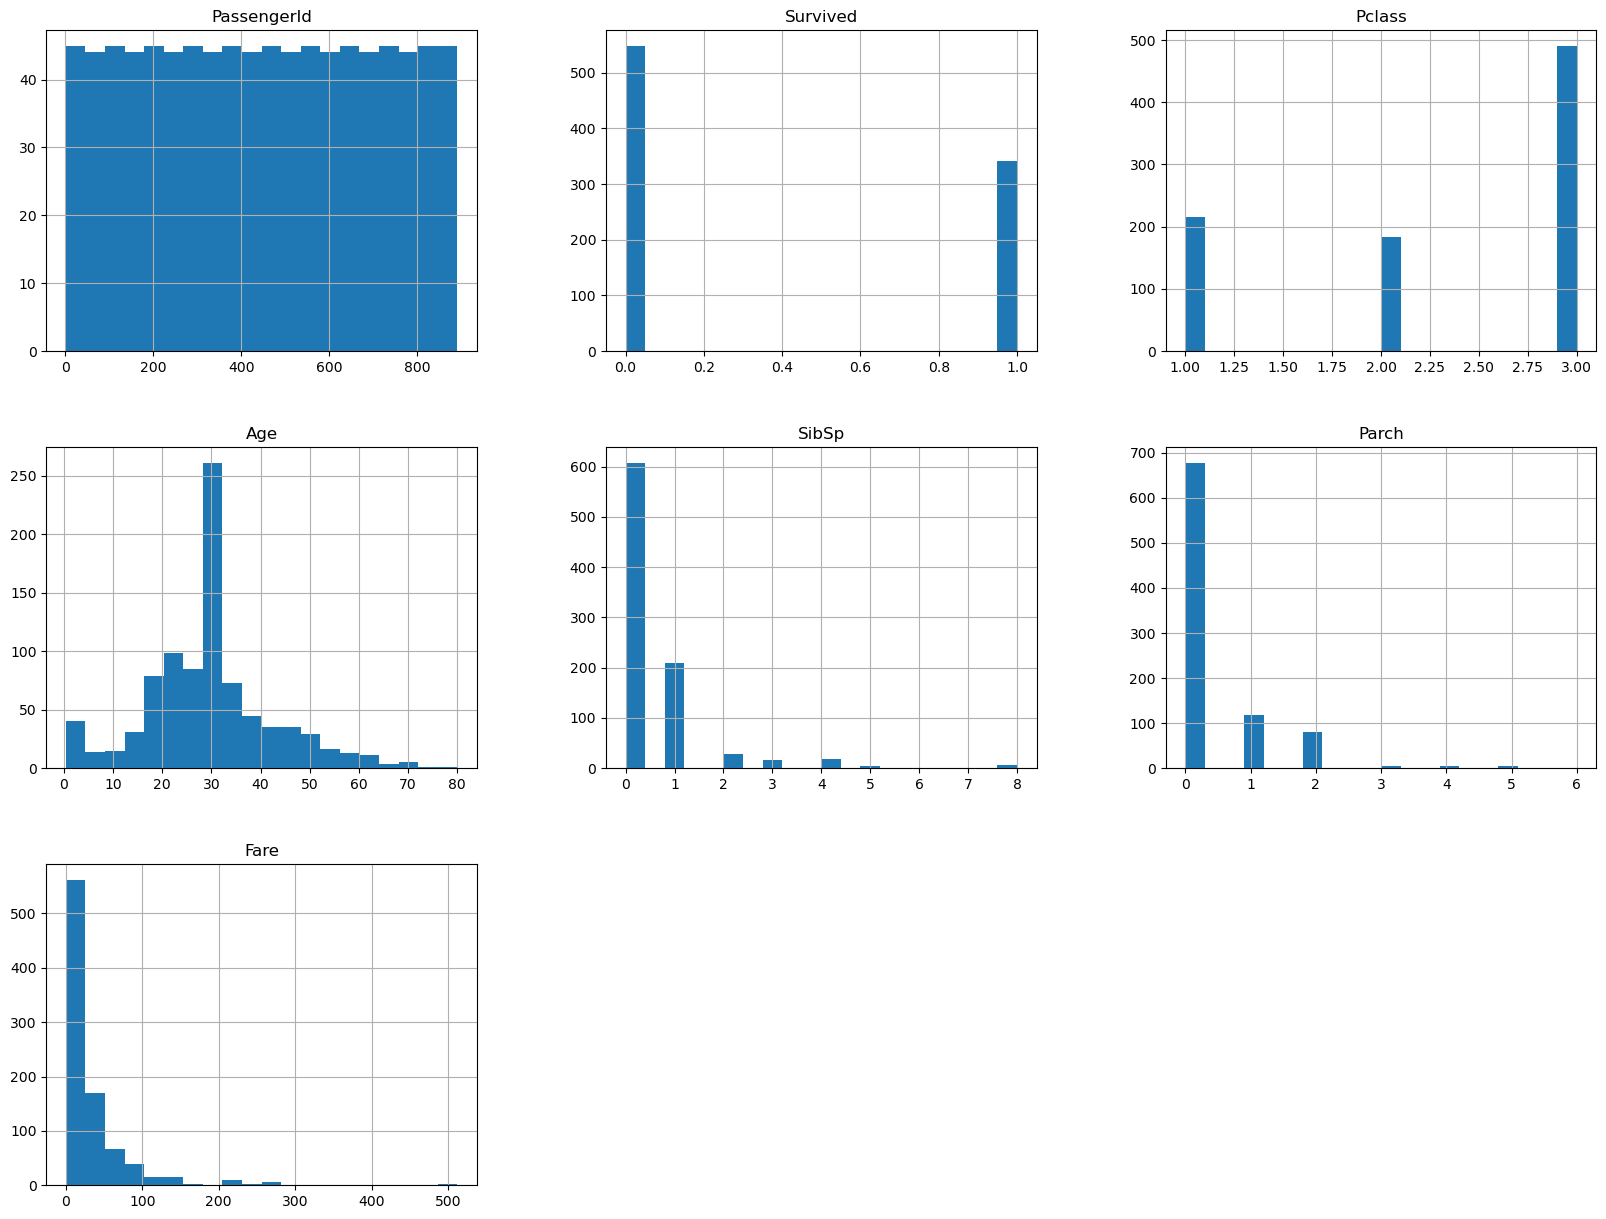

In [18]:
# Histograms
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

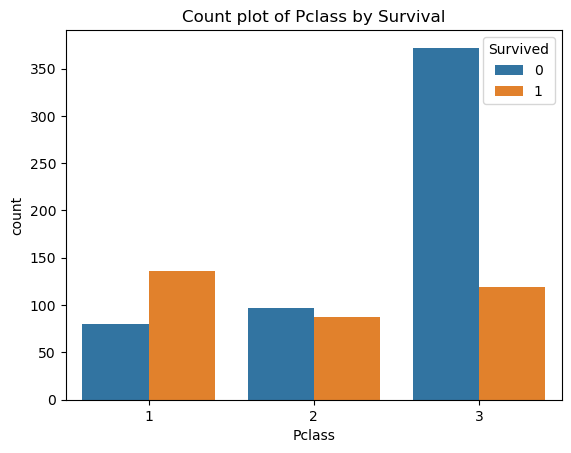

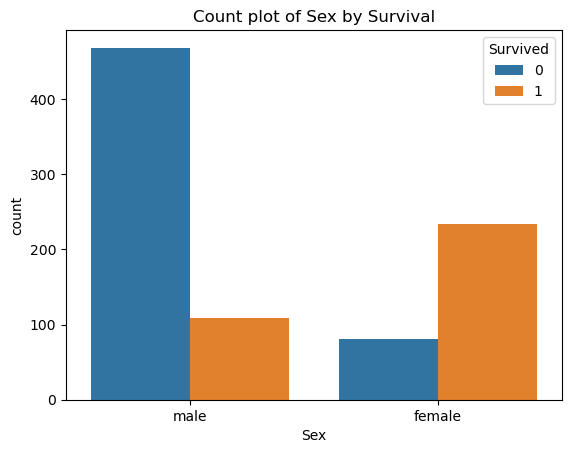

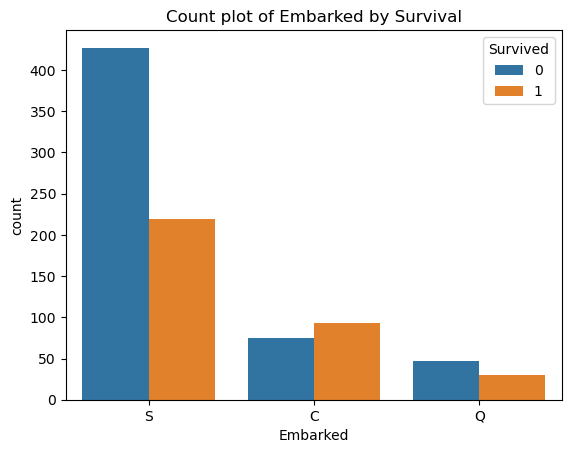

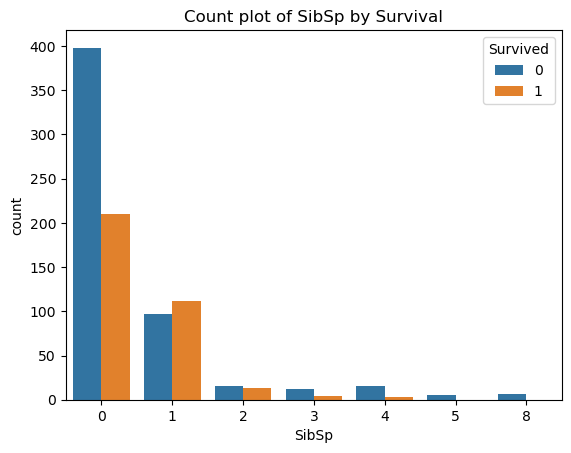

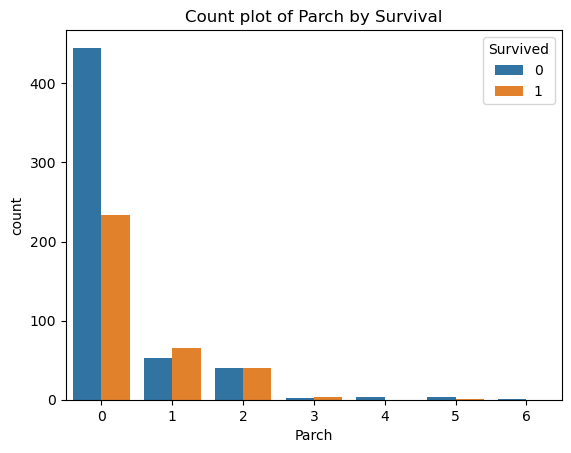

In [19]:
columns = ['Pclass', 'Sex', 'Embarked','SibSp','Parch']

for column in columns:
    sns.countplot(x=column, hue='Survived', data=train_data)
    plt.xlabel(column)
    plt.title(f'Count plot of {column} by Survival')
    plt.show()

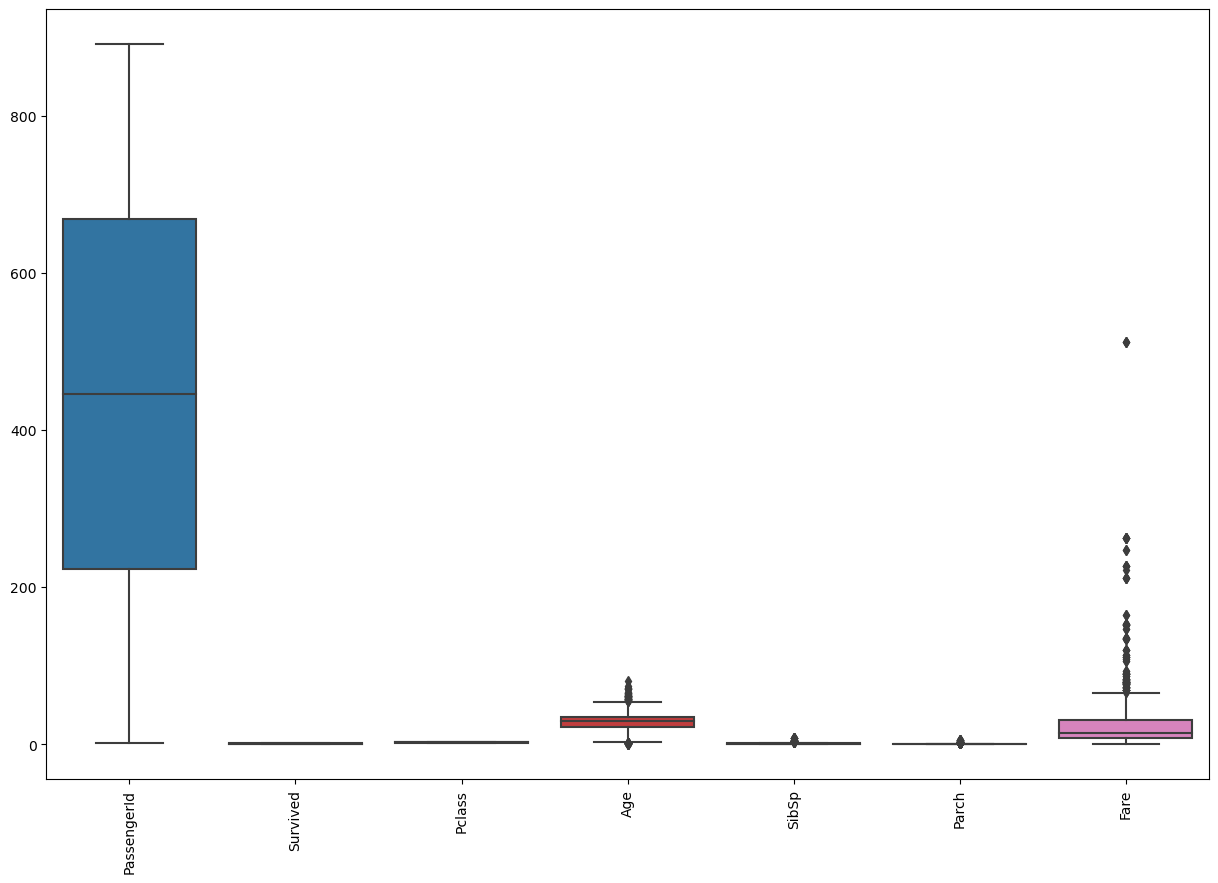

In [20]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)
plt.show()

In [21]:
#no need to remove outlier

In [22]:
object_list = ['Sex','Embarked'] 

In [23]:
#for train data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in object_list:
    train_data[x] = le.fit_transform(train_data[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  Sex
Mapping:  {'female': 0, 'male': 1}
Feature:  Embarked
Mapping:  {'C': 0, 'Q': 1, 'S': 2}


In [24]:
#for test data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in object_list:
    test_data[x] = le.fit_transform(test_data[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  Sex
Mapping:  {'female': 0, 'male': 1}
Feature:  Embarked
Mapping:  {'C': 0, 'Q': 1, 'S': 2}


In [25]:
#x and y
x = train_data.drop(columns=['Survived','PassengerId','Name','Ticket'] ,axis=1)
y = train_data['Survived']

In [26]:
#test data
test_data.drop(columns=['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [27]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [30]:
#standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
test_scaled = scaler.transform(test_data)

In [31]:
test_df = pd.concat([x, test_data], ignore_index=True)

In [32]:
#split data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)

(712,)
(179,)


In [34]:
import lightgbm as lgb

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [35]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_lgb = lgb_model.predict(x_test)
y_pred_xgb = xgb_model.predict(x_test)

# Evaluation metrics
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_lgb), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_xgb)],
    'F1 Score': [f1_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_xgb)],
}

metrics_df = pd.DataFrame(metrics, index=['LightGBM', 'XGBoost'])
print(metrics_df)

          Accuracy  Precision    Recall  F1 Score
LightGBM  0.821229   0.783784  0.783784  0.783784
XGBoost   0.798883   0.771429  0.729730  0.750000


In [37]:
#here lightGBM have higher accuracy as faster than XGBoost

In [38]:
from sklearn.model_selection import GridSearchCV

# LightGBM hyperparameter tuning
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(x_train, y_train)
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [39]:
# XGBoost hyperparameter tuning
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [42]:
# Use the best models from hyperparameter tuning
best_lgb_model = grid_search_lgb.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions with best models
y_pred_best_lgb = best_lgb_model.predict(x_test)
y_pred_best_xgb = best_xgb_model.predict(x_test)

# Evaluation metrics for best models
best_metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_best_lgb), accuracy_score(y_test, y_pred_best_xgb)],
    'Precision': [precision_score(y_test, y_pred_best_lgb), precision_score(y_test, y_pred_best_xgb)],
    'Recall': [recall_score(y_test, y_pred_best_lgb), recall_score(y_test, y_pred_best_xgb)],
    'F1 Score': [f1_score(y_test, y_pred_best_lgb), f1_score(y_test, y_pred_best_xgb)]
}

best_metrics_df = pd.DataFrame(best_metrics, index=['LightGBM', 'XGBoost'])
print(best_metrics_df)


          Accuracy  Precision    Recall  F1 Score
LightGBM  0.804469   0.809524  0.689189  0.744526
XGBoost   0.821229   0.828125  0.716216  0.768116


In [ ]:
#before hyperparameter tuning

In [44]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
LightGBM,0.821229,0.783784,0.783784,0.783784
XGBoost,0.798883,0.771429,0.729730,0.750000


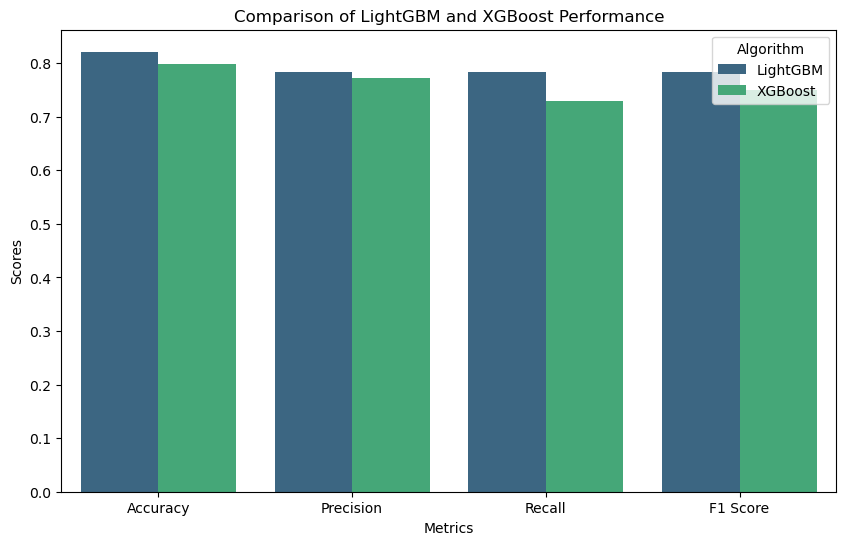

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = {
    'Algorithm': ['LightGBM', 'XGBoost'],
    'Accuracy': [0.821229, 0.798883],
    'Precision': [0.783784, 0.771429],
    'Recall': [0.783784, 0.729730],
    'F1 Score': [0.783784, 0.750000]
}
df = pd.DataFrame(data)

# Convert the DataFrame to long format
df_long = df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Metric', y='Score', hue='Algorithm', palette='viridis')
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend(title='Algorithm')
plt.show()


In [57]:
#after hyperparameter tuning

In [58]:
best_metrics_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.804469,0.809524,0.689189,0.744526
1,XGBoost,0.821229,0.828125,0.716216,0.768116


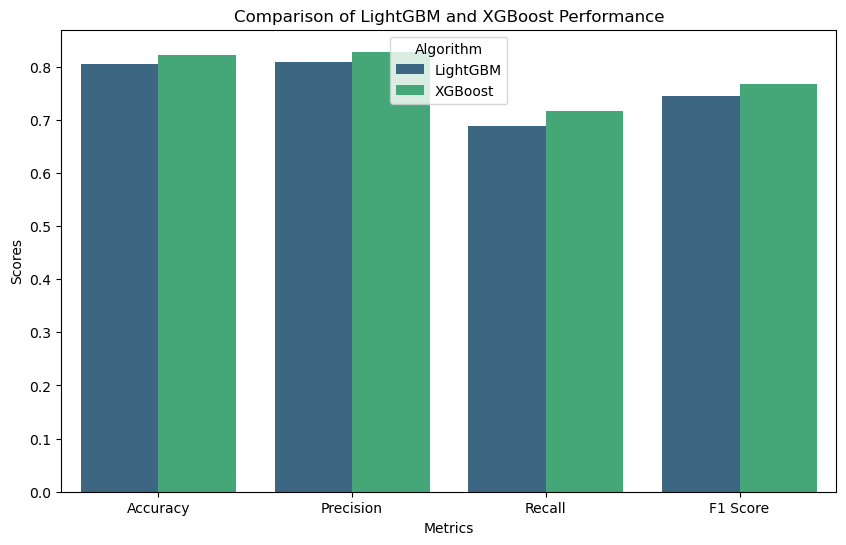

In [65]:
# Assuming best_metrics_df is your DataFrame
best_metrics_df = pd.DataFrame({
    'Algorithm': ['LightGBM', 'XGBoost'],
    'Accuracy': [0.804469, 0.821229],
    'Precision': [0.809524, 0.828125],
    'Recall': [0.689189, 0.716216],
    'F1 Score': [0.744526, 0.768116]
})

df1 = pd.DataFrame(best_metrics_df)

# Convert the DataFrame to long format
df_long1 = df1.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long1, x='Metric', y='Score', hue='Algorithm', palette='viridis')
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend(title='Algorithm')
plt.show()